# Employee's retention analysis and management

This Jupyter notebook contains a challenge I met during my applications for data science jobs. I was asked to create machine learning models to predict if an employee will leave the company. The dataset is fictional and contains data from the employees of a fictional company. The reason why I found this challenge interesting relies on the fact that it brings to the discussion several important concepts related to data science and business altogether. 

The challenge was designed to simulate a job situation. Specifically, I would have one week to develop a minimal viable product (MVP) with at least one predictive model. Then, I would present the findings to a department explaining:
    * The data science approach for the initiative
    * The findings of the first week
    * The suggested next steps.
    
This notebook will discuss solely the model. What I will present here might be considered way more than just a prototype. It contains a robust data analysis and a careful implementation, testing, and optimization of the machine learning models. We will go through the most common steps of the machine learning pipeline. These include data analysis, feature engineering, feature selection, application of the machine learning model, and studying their performance using appropriate key performance indicators, or KPI's for short. 

The goal of all data scientists is to extract meaningful insights from the collected data. In general, he or she gains this insight by creating a model that will be used to make predictions with new data. His or her **goal** and the **the data itself** are what dictate the approach a scientist must take in a project. 

Given an employee, our goal is to predict if **an employee will leave the company**. This a yes or no question. In general, if there is a variable that contains this information in the dataframe, then we can set it as the variable we want to predict. Therefore, for this case, we must create an algorithm for **binary classification**. If there isn't such a variable but there is one that contains more than two unique values that tells us whether the employee works or not in the company, then this variable might also be used as the one we want to predict. In the case where we predict more than two values (multi-class classification), the models we must choose must make use of the **softmax classifiers**. This is a problem we solve more commonly using deep learning. However, due to the fact that deep learning requires a lot of data, we must check if our clean dataset contains enough data so that we can justify this type of modelling. If that is not the case and we want to stick to binary classification, then we must engineer the values of the variable we want to predict in order to make it assume only two values. Let us check which will be the case.

Below, we present the steps we took and the model.

# 1. Data Analysis

In this section we will do the data analysis step of the machine learning pipeline. Whenever we are in position to conclude something important about the data, we will enumerate it in bold such as **Conclusion #**.

In general, the steps in the machine learning pipeline are not taken separately. As we will see, we will analyze the data and this will already allow us to select some features directly. For good presentation, we will separate the feature selection part for section 2.

We start our analysis below in order to identify:

    1.1 - Missing values
    1.2 - Numerical variables
    1.3 - Categorical variables
    1.4 - Meaning of the features
    
====================================================================================================

**Import the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# to display all the columns of a pandas dataframe
pd.pandas.set_option('display.max_columns', None)

**Load and visualize the data**

In [3]:
df = pd.read_csv('data_employees.csv', index_col=0)

In [4]:
df.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
1,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
2,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
3,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
4,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
5,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


**Number of rows and columns**

In [5]:
df.shape

(44692, 18)

The number of rows is therefore 44692 and the number of columns is 18.

### 1.1 - Missing values

In order to find the missing values we must identify the columns that contain values which are missing. The code below will create a list with the names of the columns that contain at least one data point that is missing.

In [6]:
# makes a list of the variables that contain missing values
cols_with_na = [col for col in df.columns if df[df[col].isnull()].shape[0] > 0]

In [7]:
cols_with_na

[]

As the list cols_with_na is empty, we conclude that there are no columns that contain missing values. Therefore, we can know exactly the amount of unique values for each variable. The code below shows the number of unique values in our dataset for each variable.

In [8]:
df.nunique()

EmployeeID             6284
recorddate_key          117
birthdate_key          5342
orighiredate_key       4415
terminationdate_key    1055
age                      47
length_of_service        26
city_name                40
department_name          21
job_title                47
store_name               46
gender_short              2
gender_full               2
termreason_desc           4
termtype_desc             3
STATUS_YEAR               9
STATUS                    2
BUSINESS_UNIT             2
dtype: int64

**Conclusion 1**: The total number of different employees in the dataset is 6284.

**Type of variables**: It is important to know the types of each variable. The line of code below enumerates the column name and the type of variable it contains.

In [9]:
df.dtypes

EmployeeID              int64
recorddate_key         object
birthdate_key          object
orighiredate_key       object
terminationdate_key    object
age                     int64
length_of_service       int64
city_name              object
department_name        object
job_title              object
store_name              int64
gender_short           object
gender_full            object
termreason_desc        object
termtype_desc          object
STATUS_YEAR             int64
STATUS                 object
BUSINESS_UNIT          object
dtype: object

We see that most of our data is composed by categorical varibles (type object). Below we make a closer analysis.

### 1.2 - Numerical variables

Let's separate the columns that contain different data types. The code below will create a list that contains the numerical variables.

In [10]:
# makes a list of numerical variables
num_vars = [col for col in df.columns if df[col].dtypes != 'O']

The columns that contain numerical values are given below.

In [11]:
num_vars

['EmployeeID', 'age', 'length_of_service', 'store_name', 'STATUS_YEAR']

We can check that 5 columns contain numerical values and see the dataframe with these variables. 

In [12]:
print('Number of numerical variables: ', len(num_vars))

# visualise the head of the dataframe with only numerical variables
df[num_vars].head()

Number of numerical variables:  5


,EmployeeID,age,length_of_service,store_name,STATUS_YEAR
1,1318,52,17,35,2006
2,1318,53,18,35,2007
3,1318,54,19,35,2008
4,1318,55,20,35,2009
5,1318,56,21,35,2010


We can see that the numerical variable "EmployeeID", which is the identification number of the employee in the company, is repeated whenever he or she spends one year in the company. Later, we will have to aggregate the data in order to avoid using features that contain the same information of other features, or delete features that do not add information at all. Another information is that the variables "length_of_service" and "STATUS_YEAR" are **temporal** variables.

#### Discrete variables

The discrete numerical variables are those which have number of values that is less than a certain amount. The code below shows us which variables are discrete.

In [13]:
# list of discrete variables
discrete_vars = [var for var in num_vars if len(df[var].unique()) < 50 and var not in ['EmployeeID']]

print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  4


In [14]:
discrete_vars

['age', 'length_of_service', 'store_name', 'STATUS_YEAR']

The number of unique numerical variables is shown below.

In [15]:
df[discrete_vars].nunique()

age                  47
length_of_service    26
store_name           46
STATUS_YEAR           9
dtype: int64

### 1.3 - Categorical variables

Following the same line of reasoning, we create a list containing the variables which are categorical.

In [16]:
# creates a list with the categorical variables
cat_vars = [col for col in df.columns if df[col].dtypes == 'O']

In [17]:
print('Number of categorical variables: ', len(cat_vars))

# visualise the head of the dataframe with only categorical variables
df[cat_vars].head()

Number of categorical variables:  13


,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,city_name,department_name,job_title,gender_short,gender_full,termreason_desc,termtype_desc,STATUS,BUSINESS_UNIT
1,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,Vancouver,Executive,CEO,M,Male,Not Applicable,Not Applicable,ACTIVE,HEADOFFICE
2,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,Vancouver,Executive,CEO,M,Male,Not Applicable,Not Applicable,ACTIVE,HEADOFFICE
3,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,Vancouver,Executive,CEO,M,Male,Not Applicable,Not Applicable,ACTIVE,HEADOFFICE
4,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,Vancouver,Executive,CEO,M,Male,Not Applicable,Not Applicable,ACTIVE,HEADOFFICE
5,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,Vancouver,Executive,CEO,M,Male,Not Applicable,Not Applicable,ACTIVE,HEADOFFICE


A nice way of visualizing the variables is by printing their values. The code below prints the unique values of each feature in our data set. We show the first 20 values for the variables that contain several unique values.

In [18]:
for col in df.columns:
    print(col, df[col].unique()[:20], '\n')

EmployeeID [1318 1319 1320 1321 1322 1323 1325 1328 1329 1330 1331 1332 1334 1335
 1338 1339 1340 1341 1343 1344] 

recorddate_key ['12/31/2006 0:00' '12/31/2007 0:00' '12/31/2008 0:00' '12/31/2009 0:00'
 '12/31/2010 0:00' '12/31/2011 0:00' '12/31/2012 0:00' '12/31/2013 0:00'
 '12/31/2014 0:00' '2/1/2009 0:00' '2/1/2014 0:00' '3/1/2014 0:00'
 '3/1/2009 0:00' '9/1/2012 0:00' '4/1/2014 0:00' '4/1/2009 0:00'
 '5/1/2009 0:00' '5/1/2014 0:00' '12/1/2014 0:00' '6/1/2009 0:00'] 

birthdate_key ['1/3/1954' '1/3/1957' '1/2/1955' '1/2/1959' '1/9/1958' '1/9/1962'
 '1/13/1964' '1/17/1956' '1/23/1967' '1/25/1967' '1/28/1965' '2/5/1955'
 '2/6/1961' '2/7/1962' '2/16/1949' '2/19/1949' '2/21/1949' '2/24/1949'
 '2/25/1949' '3/4/1949'] 

orighiredate_key ['8/28/1989' '8/31/1989' '9/2/1989' '9/5/1989' '9/8/1989' '9/9/1989'
 '9/10/1989' '9/15/1989' '9/16/1989' '9/20/1989' '9/22/1989' '9/23/1989'
 '9/25/1989' '9/29/1989' '10/2/1989' '10/3/1989' '10/4/1989' '10/5/1989'
 '10/6/1989' '10/7/1989'] 

termination

Let us analyze the data for one specific employee.

In [19]:
df[df['EmployeeID'] == 1344].tail()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
170,1344,12/31/2010 0:00,2/25/1949,9/25/1989,2/25/2014,61,21,Vancouver,HR Technology,"Director, HR Technology",35,F,Female,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
171,1344,12/31/2011 0:00,2/25/1949,9/25/1989,2/25/2014,62,22,Vancouver,HR Technology,"Director, HR Technology",35,F,Female,Not Applicable,Not Applicable,2011,ACTIVE,HEADOFFICE
172,1344,12/31/2012 0:00,2/25/1949,9/25/1989,2/25/2014,63,23,Vancouver,HR Technology,"Director, HR Technology",35,F,Female,Not Applicable,Not Applicable,2012,ACTIVE,HEADOFFICE
173,1344,12/31/2013 0:00,2/25/1949,9/25/1989,2/25/2014,64,24,Vancouver,HR Technology,"Director, HR Technology",35,F,Female,Not Applicable,Not Applicable,2013,ACTIVE,HEADOFFICE
48174,1344,2/1/2014 0:00,2/25/1949,9/25/1989,2/25/2014,65,24,Vancouver,HR Technology,"Director, HR Technology",35,F,Female,Retirement,Voluntary,2014,TERMINATED,HEADOFFICE


By looking at the data for this specific employee we can draw more conclusions:

**Conclusion 2**: Data is recorded for each year of work of a given employee. The only features that change each year are recorddate_key, age, lenght_of_service, termreason_desc, termtype_desc, STATUS_YEAR and STATUS. All the other features remain the same.

**Conclusion 3**: The information contained in some columns are **redundant**. By "redundant" we mean that the same information can be obtained from another column. 

### 1.4 - Meaning of the features
In order to exclude redundant features or those with that do not contribute to our predictions we first describe what each column means.

- 'EmployeeID': Number of identification of the employee. The number itself has no predictive power.
- 'recorddate_key': Date in which the data was recorded. No predictive power. The year might have predictive power but this information is already contained in "STATUS_YEAR".
- 'birthdate_key': Date of birth of the employee. As we have "age" in our data, "birthdate_key" has no predictive power.
- 'orighiredate_key': Date in which the employee was hired. As we have "length_of_service" in our data, "orighiredate_key" has no predictive power.
- 'terminationdate_key': Date in which the employee's contract was terminated. As we have "length_of_service" in our data, 'terminationdate_key' has no predictive power.
- 'age': Age of the employee.
- 'length_of_service': Number of years working in the company.
- 'city_name': City of the company.
- 'department_name': Department where the employee works
- 'job_title': Describes the role and the position of the employee.
- 'store_name': It is an identification number for the store.
- 'gender_short': Abbreviation for gender.
- 'gender_full': Gender fully written. It is redundant since we have "gender_short" in our data.
- 'termreason_desc': Reason for termination of the contract, or if the employee still works in the company.
- 'termtype_desc': Describes whether the employee left the compnay voluntaryly or not (voluntarily if employee retired or resigned, involuntarily if employee was fired). It is a redundant feature.
- 'STATUS_YEAR': Year for which we have the given status.
- 'STATUS': Status of the contract. If "ACTIVE" the employee still works there, if "TERMINATED" the employee no longer works there.
- 'BUSINESS_UNIT': It says whether the employee works in the store or in the administrative office.

=========================================================================================================

# 2. Feature selection

**What is the variable we want to predict?**

This is a very important question and we now give an answer to it. The variable "STATUS" contains only two values representing whether the employee works in the company or not. In fact, as we discussed, in this case we might easily use a binary classification algorithm. But this information is also contained in the column "termreason_desc", since we can infer if the employee works there by its values, which are 'Not Applicable' if he or she still works in the company, and 'Retirement', 'Resignaton', and 'Layoff' if he or she no longer works there. If we use this column as the variable we want to predict we can make use of a softmax classifier and infer if the employee's contract is still active, and if not, we can also infer the reason why he or she left. In order to decide, we must first check how much data we have after excluding redundant information.

Before excluding redundant information, we analize more closely the data for one given employee (you can take anyone).

In [20]:
df[df['EmployeeID'] == 1318].tail()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
5,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
6,1318,12/31/2011 0:00,1/3/1954,8/28/1989,1/1/1900,57,22,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2011,ACTIVE,HEADOFFICE
7,1318,12/31/2012 0:00,1/3/1954,8/28/1989,1/1/1900,58,23,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2012,ACTIVE,HEADOFFICE
8,1318,12/31/2013 0:00,1/3/1954,8/28/1989,1/1/1900,59,24,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,HEADOFFICE
9,1318,12/31/2014 0:00,1/3/1954,8/28/1989,1/1/1900,60,25,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2014,ACTIVE,HEADOFFICE


Take the last row, which is number 9, and any previous one, such as number 6. Given that they are data for the same employee, do they contain different information? In other words, can I infer the information of one row from another? Consider the columns "age", "length_of_service", "STATUS_YEAR", and "STATUS", as shown below.

In [21]:
df[df['EmployeeID'] == 1318].iloc[[5,8]][["age", "length_of_service", "STATUS_YEAR","STATUS"]]

,age,length_of_service,STATUS_YEAR,STATUS
6,57,22,2011,ACTIVE
9,60,25,2014,ACTIVE


If we are given just the row 6, we can not infer "STATUS" for the year 2014, although we can for sure infer "age" and "length_of_service" if the employee did not terminate the contract. If we are given juust the row number 9, we can infer all the information in row number 6. If the "STATUS" is "ACTIVE" or "TERMINATED" in 9, it means that it is "ACTIVE" in any previous year. So, given the last row of data we can always infer the relevant information for any previous row of data!

**Conclusion 4**: The only important row for a given employee is the last one: Previous relevant features with predictive power can be easily inferred by the last row. For a given employee in our dataset, we must keep only the last row and drop all the others.

**Dropping unimportant rows**

We drop some data based on the conclusions 1, 2, 3, and 4.

The code below keeps only the last row of data for a given employee.

In [22]:
df_partial = df.drop_duplicates('EmployeeID', keep='last')

In [23]:
df_partial.head(3)

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
9,1318,12/31/2014 0:00,1/3/1954,8/28/1989,1/1/1900,60,25,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2014,ACTIVE,HEADOFFICE
19,1319,12/31/2014 0:00,1/3/1957,8/28/1989,1/1/1900,57,25,Vancouver,Executive,VP Stores,35,F,Female,Not Applicable,Not Applicable,2014,ACTIVE,HEADOFFICE
29,1320,12/31/2014 0:00,1/2/1955,8/28/1989,1/1/1900,59,25,Vancouver,Executive,Legal Counsel,35,F,Female,Not Applicable,Not Applicable,2014,ACTIVE,HEADOFFICE


**Dropping unimportant columns**

Due to the analysis done in section 1.4, we notice that most of the columns contain redundant information. In fact, we group them below in a list called drop_vars.

Now, we drop all the columns with no predictive power and then reset all indices.

In [24]:
drop_vars = ['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
       'terminationdate_key', 'gender_full', 'termtype_desc']

In [25]:
data = df_partial.drop(drop_vars, axis=1).reset_index(drop=True)

In [26]:
data.head(3)

,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,60,25,Vancouver,Executive,CEO,35,M,Not Applicable,2014,ACTIVE,HEADOFFICE
1,57,25,Vancouver,Executive,VP Stores,35,F,Not Applicable,2014,ACTIVE,HEADOFFICE
2,59,25,Vancouver,Executive,Legal Counsel,35,F,Not Applicable,2014,ACTIVE,HEADOFFICE


**Choosing the variable we want to predict and the appropriate algorithm**

In order to make this choice we must check the dimensions of our dataframe.

In [27]:
data.shape

(6284, 11)

We remained with 6284 rows, i.e. one row for each employee, and only eleven columns. This is not a very big dataset and it is better to exclude the possibility of using any algorithms that involve softmax classifiers with deep learning. In fact, we will not use multi-classification at all.


Now, we know for sure that we must use a binary classification algorithm. For this reason, we must choose the variable "STATUS" as the variable we want to predict.  We can choose a **logistic regression** algorithm, or tree based algorithm such as **decision trees** or **random forest** algorithms. We will test all of them. Although these algorithms might be used for the same purpose, it is of extremal importance to emphasize the fundamental difference them: Tree based algorithms do not make assumptions concerning the distribution of the features, unlike logistic regression that assumes that residuals in numeric variables are normally distributed. In other words, this means that we must preprocess the data a bit more for logistic regression.

Since we decided to use these algorithms, the column "termreason_desc" becomes obsolete in our dataset: It would be relevant if we wanted to use a softmax classifier. So, we also drop it.

In [28]:
data.drop('termreason_desc', axis=1, inplace=True)

In [29]:
data.shape

(6284, 10)

The new shape of the dataframe is now 6284 rows and 10 columns. 

**What about the evaluation set?**

After modelling and evaluating the performance of our algorithm, we want to use it to make predictions with new data. This new data is contained in our evaluation set. Before feedind the model with the data, we need to check if there are any immediate flaws in our reasoning by inspecting the evaluation set. This is what we will do now.

Let us read the evaluation data set and visualize its first and last three rows using the features we selected.

In [30]:
df_eval_set = pd.read_csv('eval_set.csv', index_col=0)[[t for t in data.columns if t!='STATUS']]

In [31]:
df_eval_set.head(3)

,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,STATUS_YEAR,BUSINESS_UNIT
10,61,26,Vancouver,Executive,CEO,35,M,2015,HEADOFFICE
20,58,26,Vancouver,Executive,VP Stores,35,F,2015,HEADOFFICE
30,60,26,Vancouver,Executive,Legal Counsel,35,F,2015,HEADOFFICE


In [32]:
df_eval_set.tail(3)

,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,STATUS_YEAR,BUSINESS_UNIT
49648,21,2,Princeton,Customer Service,Cashier,27,M,2015,STORES
49649,21,2,Valemount,Dairy,Dairy Person,34,M,2015,STORES
49651,21,2,White Rock,Customer Service,Cashier,39,F,2015,STORES


The first thing we notice is that the variable "STATUS_YEAR" has value 2015. This value appears only in the evaluation set, and not in the dataset of the problem. The modelling dataset contains values for this variable that ends in 2014. This means **we will create a machine learning model to predict which employees will leave the company in the following year**. When we want to predict values of variables at a future time, we say that we have a **forecasting model**. There are particularities about forecasting methods that differ from a usual predictive method. The most important one is related to how we separate our data into training and test set. In a forecasting model, we separate as training set the data collected up to a certain point in time. The test set will be the remaining data corresponding to the values in the future. The training and test set must respect a chronological order. As we want to predict which employee will leave the company in the next year, the question that arises now is whether or not we must model our data using a forecasting model. Let us analyse each situation.

**Situation 1: Model using forecasting methods**

If that is the case we must proceed as follows:
    i. Separate the test set using data solely of the last year in the dataset
    ii. Train the model with data of the previous years
    iii. Optimize the parameters to have the best performance in the training and test set
    iv. Retrain the model using all the data and use it to forecast the values for the evaluation set


**Situation 2: Model using ordinary predictive methods**

If that is the case we must proceed as follows:
    i. Split the data into training and test set randomly. This means the training and test sets will contain data of all the years
    ii. Train the model 
    iii. Optimize the parameters to have the best performance in the training and test set
    iv. Retrain the model using all the data and use it to predict the values for the evaluation set. In this case the evaluation set will contain data corresponding solely to the year 2015. 
    
**Avoiding biases**

Notice that in the first case, we are selecting data of one single year, i.e the year 2014, as our test data. As the evaluation set contains data only of the year 2015, it seems more realistic to choose forecasting methods over predictive methods: The modelling and evaluation procedure are the same! It does not seem to make so much sense to test a model with data of all the years in order to make predictions for one single year. 

As data scientists we must think not only about the science of extracting insights from data but also about everything related to the business. The company is not isolated from the world and it reacts several internal and external factors. Decisions made internally which are known by the data scientists are possible to implement in the model in order to adjust it to make better predictions, or, at least, to expect measurable deviations in certain directions. External factors such as financial crisis, commercial war, war, development of disruptive technologies for instance, are very hard to predict. The point is that in both cases the company will be led to hire or fire more in specific years. In other words, the company undergoes different regimes. Each regime influences the data in a particular manner. Suppose that in the year 2014 the company had to pay a lot of its debts acquired in all previous years, when it was expanding, and decisions like this never occured before. Because of that, the direction decides to fire more people in order to have more money to honor such debts. Suppose as well that we are creating a forecasting model that uses the year 2014 as test data. The performance of the model will be evaluated in such a way that we get less misclassification in both training and test set. But the test set contains a regime that is not present in the training set. Unnaware of that, the data scientist will optimize the model in order to achieve the best possible statistics. In other words, the data scientist is tunning the hyperparameters in order to obtain the best performance and consequently deploy the model. Suppose now that the data scientist achieved the desired statistical significance, deployed the model, but the model failed badly to make correct predictions. In this case, we say that the data scientist commited the mistake of **p-hacking**. This is probably one of the most dangerous biases that exist. Another problem with this approach of selecting one very special year as test set is related to the **selection bias**. The selection bias corresponds to modelling data that comes from one specific distribution and test it with data that comes from another distribution. Selecting the year 2014 as test data will likely make the algorithm suffer of selection bias. 

In order to avoid these biases we must avoid modelling the data using forecating methods. If we use odinary predictive models the training and test sets will contain data from different regimes (distributions). It will be way more trustworthy because it was trained and optimized with data belonging to all regimes. Saying that one model is right and the other is wrong is very complicated in data science. But if the predictions of our model will be used to take decisions that involve lives or huge amount of money, then must be conservative in every aspect in order to avoid deaths and catastrophic financial losses. These are not the case here, but we decided to use ordinary methods because, as we said, we want to avoid those biases.


What if the evaluation set contains a regime that was never seen before? In this case the failure or success of any model is a matter of luck. The models must be avoided in the process of taking decisions.


Since now we decided to use ordinary predictive models we have one more problem. The column "STATUS_YEAR" contains year 2015 for the evaluation set but this value is not present neither in the training nor in the test set. This is a pitfall we must avoid: **we can not model a binary classification algorithm and make predictions with values for categorical or temporal features it has never seen before** (or, at least, this is not good practice). For this reason, we will also drop the variable "STATUS_YEAR".

**Drop the column "STATUS_YEAR" for the dataset and evaluation set**:

In [33]:
data.drop('STATUS_YEAR', axis=1, inplace=True)

In [34]:
df_eval_set.drop('STATUS_YEAR', axis=1, inplace=True)

**Is the dataset balanced or unbalanced?**

In a binary classification problem, we say that a dataset is balanced when the variable we want to predict have the same amount of "yes" and "no". In our case, the variable we want to predict is "STATUS" and whose values are "ACTIVE" and "TERMINATED". The code below gives the number of times each value appears in the dataset.

In [35]:
print("The number of times the value ACTIVE appears is ", str(data[data["STATUS"] == "ACTIVE"].shape[0]) + ".")

The number of times the value ACTIVE appears is  4961.


In [36]:
print("The number of times the value TERMINATED appears is ", str(data[data["STATUS"] == "TERMINATED"].shape[0]) + ".")

The number of times the value TERMINATED appears is  1323.


**Conclusion 5**: The dataset is unbalanced.

The importance of this result relies in the fact that accuracy will not be an appropriate performance metric for our problem.

**Statistics and visualization**

Many questions might arise when analyzing the data. We might ask for instance what is the age in which the employee is more likely to have the contract terminated. In order to help us answer these type of questions we will create a function that returns a dataframe containing the percentage of ACTIVE and TERMINATED contracts for a given feature with a given value.

The function is given below.

In [37]:
def df_percentage(df):
    """
    This function creates a multiindex dataframe. The indices represent the feature and its value. 
    The columns represent the percentage of active and terminated contracts
    
    Input:
    df: pd.DataFrame - Dataframe containing the features whose percentages we want to exhibit
    
    Output:
    df_perc: pd.DataFrame - Multiindex dataframe
    """
    
    # creates a list with the features
    columns = [col for col in df.columns if col != 'STATUS']
    
    # creates an empty dictionary that will be used to store the data
    perc_dict = {}

    # loop over the features
    for var in columns:
        
        # creates an array with the unique values for a given feature
        values = sorted(df[var].unique())
        
        # loop over the unique values for a given feature
        for val in values:
            
            # total amount of times a value appears for a given feature
            num_by_feat = df[df[var] == val].shape[0]

            # number of times the status is ACTIVE for the given feature and value
            num_active = df[(df['STATUS'] == 'ACTIVE') & (df[var]==val)].shape[0]
            
            # percentual value for ACTIVE status for the given feature and value
            perc_active = num_active / num_by_feat
            
            # percentual value for TERMINATED status for the given feature and value
            perc_terminated = 1 - perc_active
            
            # store data in a dictionary
            perc_dict[(var, val)] = [perc_active, perc_terminated]
    
    # creates a multiindex dataframe
    df_perc = pd.DataFrame(perc_dict).T
    
    # name indices and columns
    df_perc.index.names = ['Feature', 'Value']
    df_perc.columns = ['ACTIVE', 'TERMINATED']
            
    return df_perc

Let us apply this function in our data. Notice that we select the features for which the percentage that we compute provides  reasonable information. The columns 'termreason_desc' and 'STATUS_YEAR', for instance, can be neglected in this context.

In [38]:
df_pct = df_percentage(data[['age', 'length_of_service', 'city_name', 'department_name', 'job_title',
       'store_name', 'STATUS', 'BUSINESS_UNIT']])

Check the head of the resulting dataframe. All contracts were terminated when the employee was 19, and 4.8% was terminated when the employee was 20, and so on.

In [39]:
df_pct.head()

ACTIVE  TERMINATED
Feature Value                      
age     19     0.000000    1.000000
        20     0.952000    0.048000
        21     0.568493    0.431507
        22     0.753968    0.246032
        23     0.786982    0.213018

In [40]:
df_pct.tail()

ACTIVE  TERMINATED
Feature       Value                           
store_name    44          0.922535    0.077465
              45          1.000000    0.000000
              46          0.913793    0.086207
BUSINESS_UNIT HEADOFFICE  0.287500    0.712500
              STORES      0.795938    0.204062

We can access the information using the command loc and passing the name of the feature. In order to see the percentage by 'length_of_service' we must run the command below. Notice that the employee is more likely to terminate the contract before 1 year of service (probably due to seasonal employees such as interns) and after 13 years of service.

In [41]:
df_pct.loc['length_of_service'].sort_values('TERMINATED', ascending=False).head() # sorted and showed first 5 rows

,ACTIVE,TERMINATED
Value,,
0,0.000000,1.000000
13,0.286558,0.713442
8,0.494145,0.505855
1,0.558442,0.441558
24,0.687151,0.312849


An easy way to visualize the number of active and terminated contracts per feature is through a count plot. Let us show how we do this for some individual features.

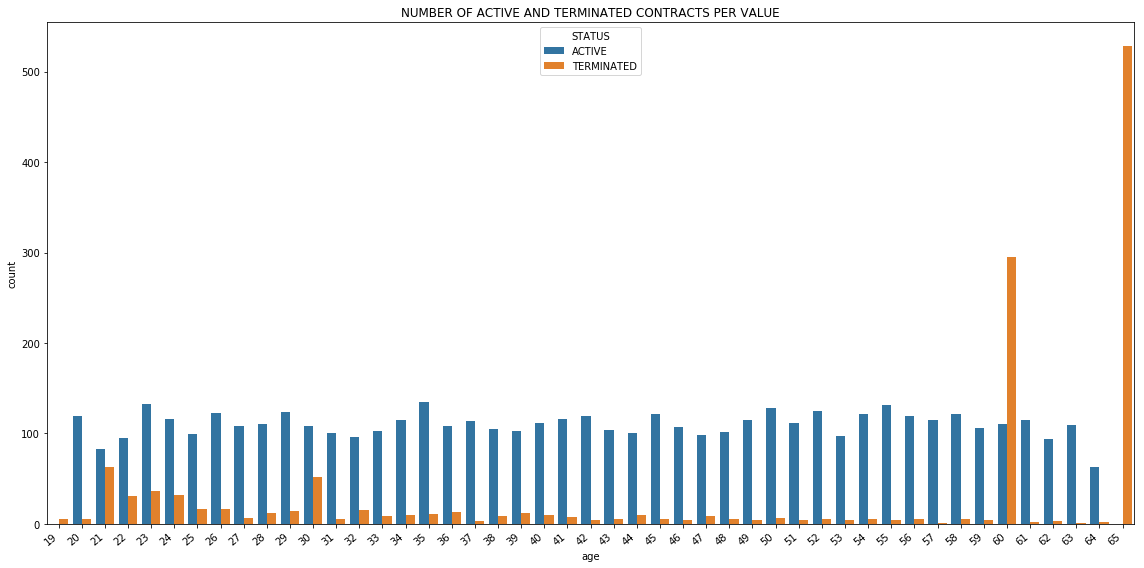

In [42]:
plt.figure(figsize=(16,8))
ax = sns.countplot(data=data, x='age', hue='STATUS')


ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('NUMBER OF ACTIVE AND TERMINATED CONTRACTS PER VALUE')
plt.tight_layout()

Many employees in early twenties terminate the contract. Many employees terminate at the age of 60 probably due to possibility of retirement of by age, and pretty much everybody terminates at the age of 65 due to compulsory retirement.

Let us check now the counting for length_of_sevice.

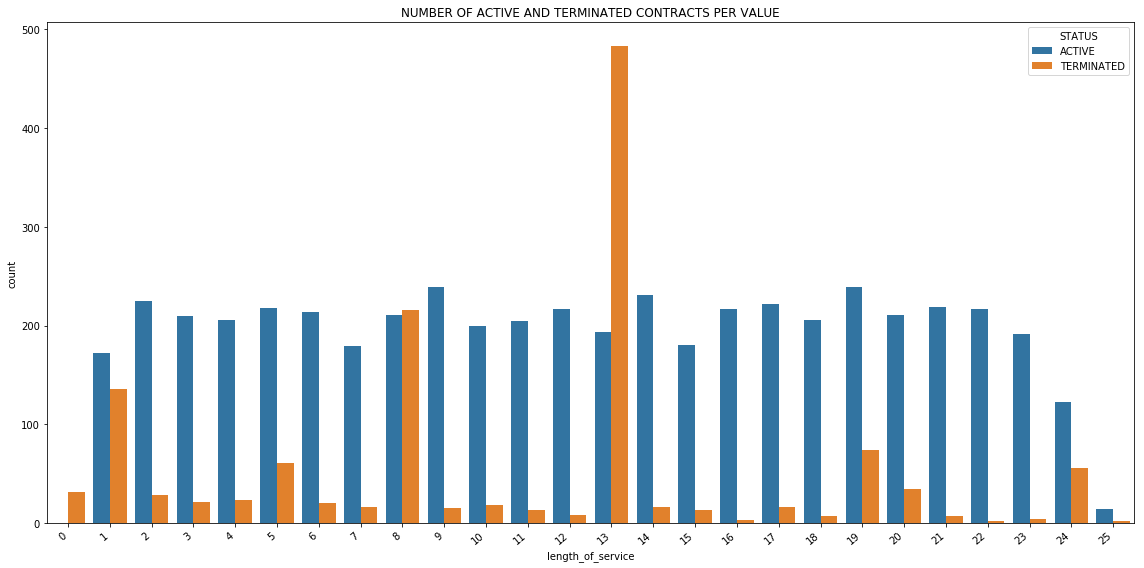

In [43]:
plt.figure(figsize=(16,8))
ax = sns.countplot(data=data, x='length_of_service', hue='STATUS')


ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('NUMBER OF ACTIVE AND TERMINATED CONTRACTS PER VALUE')
plt.tight_layout()

After 8 years of service the numbers of active and terminated contracts are almost the same. After 13 years the number of terminated contracts is way above the number of active ones.

Now we check the counting per city.

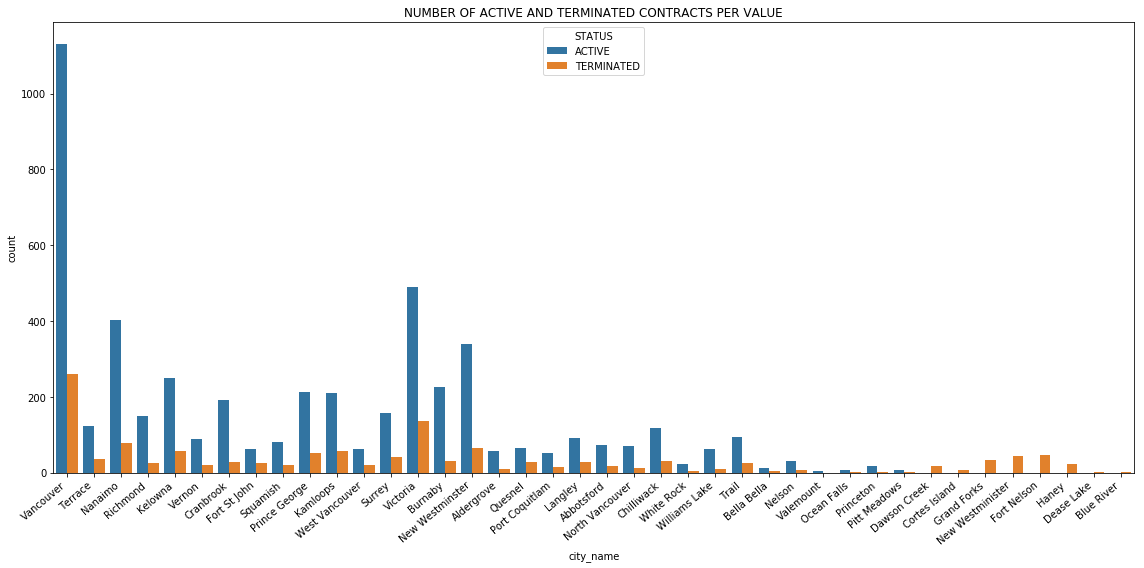

In [44]:
plt.figure(figsize=(16,8))
ax = sns.countplot(data=data, x='city_name', hue='STATUS')


ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('NUMBER OF ACTIVE AND TERMINATED CONTRACTS PER VALUE')
plt.tight_layout()

We see that in some cities the seems to be no active contract. This is probably due to the permanent closing of a store.

Let us check the gender of the majority of the employees.

In [45]:
print("The number of people of the gender masculine is ", data[data['gender_short'] == 'M'].shape[0], ".")

The number of people of the gender masculine is  3006 .


In [46]:
print("The number of people of the gender feminine is ", data[data['gender_short'] == 'F'].shape[0], ".")

The number of people of the gender feminine is  3278 .


We can repeat this analysis for all the features, if we wish. The idea was just to illustrate how important information, such as retirement or permanent closing of a store, might be obtained by visualizing this plot.

# 3. Feature Engineering

In this section we will preprocess our data in order to use the tree algorithms. The only thing we have to do here is to transform the categorical variables into numbers so that the scikit learn library can interpret them. Before we do that, let us create a list containing the numerical and the categorical variables of our clean dataframe.

In [47]:
# makes a list of numerical variables
new_num_vars = [col for col in data.columns if data[col].dtypes != 'O']

In [48]:
new_num_vars

['age', 'length_of_service', 'store_name']

In [49]:
# creates a list with the categorical variables
new_cat_vars = [col for col in data.columns if data[col].dtypes == 'O' and col != 'STATUS']

In [50]:
new_cat_vars

['city_name', 'department_name', 'job_title', 'gender_short', 'BUSINESS_UNIT']

As we analyzed before, the numerical variables are all discrete. When we have discrete variables, we have to choose whether to treat them as numerical or as categorical. If we have a huge number of discrete variables, it is more appropriate to treat them as numerical. If otherwise, it makes more sense to treat them as categorical. We have to remember that pre-processing for numerical and categorical depends on the model we choose. Let us analyze one by one.

The variable 'store_name' actually represents the name of a store. It does not make sense to treat is as numerical: We can not associate statistical measures with this variable! It's wrong to say the mean of the store name! So, 'store_name' must be treated as categorical.

The variables 'age' and 'length_of_service' could be treated as numerical, and in fact, we have a fair number of unique values of them to do so. It is also possible to treat them as categorical due to their discreetnes. We will adopt the latter because this simplifies our work: All variables will be treated as categorical. When in doubt, the recommendation is to test both cases and stick to the one gives the desired result, be it robustness or performance.

In [51]:
# All variables are treated as categorical
all_vars = new_num_vars + new_cat_vars

In order to transform the categorical variables into numbers we use the following command

In [52]:
df_final = pd.get_dummies(data, columns=all_vars, drop_first=True)

In [53]:
data.columns

Index(['age', 'length_of_service', 'city_name', 'department_name', 'job_title',
       'store_name', 'gender_short', 'STATUS', 'BUSINESS_UNIT'],
      dtype='object')

When we add drop_first=True the command ignores one of the new columns. This occurs because one column that has n distinct value can be described by n-1 values. For instance, the columns with the features "male" and "female" can be converted in a single column with value 0 for "female" and value 1 for "male".

Since we no longer have numerical variables, we do not treat them (normalize or standardize).

Now, our data is ready to be used in the algorithm.

# 4. Tree Based Models

In this section we will create our predictive tree based model. We will use the scikit learn library.

**Split the data in training set and test set**

We must first import the train_test_split function, then separate the data that will be used as feature, i.e. X, and as the variable we want to predict, i.e. y.

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X = df_final.drop('STATUS', axis=1) # Selects the features
y = df_final['STATUS'] # Selects the variable we want to predict

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

**Modelling with a decision tree algorithm**

Now we import the decision tree classifier, instantiate the object, and then we train (fit) the model passing X_train and y_train as inputs.

In [56]:
# Import decision tree classifier from scikit learn
from sklearn.tree import DecisionTreeClassifier

In [57]:
# instantiate the object DecisionTreeClassifier(). Fix random state to be 1
dt = DecisionTreeClassifier(random_state=1)

In [58]:
# Train the model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

As the model is already trained, we now make predictions for the test set.

In [59]:
# Uses the trained model to make predictions for the test set
dt_pred = dt.predict(X_test)

Our predictions are given by dt_pred. We will make the comparison between the real and predicted values in the next section.

**Modelling with a random forest algorithm**

Here, we follow the same line of reasoning as before.

In [60]:
# Import random forest classifier from scikit learn
from sklearn.ensemble import RandomForestClassifier

In [61]:
# instantiate the object RandomForestClassifier(). Fix random state to be 1
rf = RandomForestClassifier(n_estimators=100, random_state=1)

In [62]:
# Train the model
rf.fit(X_train, y_train),

(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
             oob_score=False, random_state=1, verbose=0, warm_start=False),)

In [63]:
# Uses the trained model to make predictions for the test set
rf_pred = rf.predict(X_test)

**Performance metrics and discussion for decision trees**

As we discussed before, the dataset is not balanced, so it does not make sense to use accuracy to evaluate the performance of these classification algorithms. Instead, we must use precision, recall, and F1-score. We will also display the confusion matrix and discuss the results.

**Import KPI's**

In [64]:
from sklearn.metrics import classification_report, confusion_matrix

**KPI's for the decision tree**

In [65]:
# Creates a report with the performance metrics for our decision tree model
print(classification_report(y_test, dt_pred)) 

              precision    recall  f1-score   support

      ACTIVE       0.97      0.98      0.98       983
  TERMINATED       0.94      0.90      0.92       274

   micro avg       0.97      0.97      0.97      1257
   macro avg       0.96      0.94      0.95      1257
weighted avg       0.97      0.97      0.97      1257



In [66]:
print(confusion_matrix(y_test, dt_pred))

[[968  15]
 [ 28 246]]


Notice below how we infer that 'ACTIVE' is what we call POSITIVE and 'TERMINATED' is what we call NEGATIVE.

In [67]:
y_test.values[:10]

array(['ACTIVE', 'ACTIVE', 'ACTIVE', 'ACTIVE', 'TERMINATED', 'TERMINATED',
       'ACTIVE', 'ACTIVE', 'ACTIVE', 'TERMINATED'], dtype=object)

In [68]:
dt_pred[:10]

array(['ACTIVE', 'ACTIVE', 'ACTIVE', 'ACTIVE', 'TERMINATED', 'TERMINATED',
       'ACTIVE', 'ACTIVE', 'ACTIVE', 'ACTIVE'], dtype=object)

In order to discuss the results we must review what the confusion matrix is. The confusion matrix is a 2x2 matrix whose element 1x1 represents the number of true positives, TP, the element 1x2 is the number of false negative, FN, the element 2x1 is the number of false positives, FP, and the element 2x2 is the number of true negatives. Looking at the matrix above we can infer that TP=967, FN=16, FP=17, and TN=257. The formulas for precision and recall are given below and if we replace the numbers we will get

$$
\text{Precision} = \frac{TP}{TP+FP} = 0.98, \;\; \text{Recall} = \frac{TP}{TP+FN} = 0.98.
$$

The performance is considered very high. We almost get 100% right for the test set, and this indicates that the whole process we described seems to be correct.

**KPI's for the random forest**

In [69]:
# Creates a report with the performance metrics for our random forest model
print(classification_report(y_test, rf_pred)) 

              precision    recall  f1-score   support

      ACTIVE       0.96      0.99      0.97       983
  TERMINATED       0.94      0.84      0.89       274

   micro avg       0.95      0.95      0.95      1257
   macro avg       0.95      0.91      0.93      1257
weighted avg       0.95      0.95      0.95      1257



In [70]:
print(confusion_matrix(y_test, rf_pred))

[[969  14]
 [ 43 231]]


By analyzing the confusion matrix we can see that the random forest algorithm has a performance a little worse if compared to the decision tree algorithm: It misclassified more negatives. However, this is a great model and shows that the whole process we described seems to be correct.

# 5. Logistic Regression

In this section we will use the logistic regression algorithm. The splitting of the data will be the same as in the previous section.

In [71]:
# Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

In [72]:
# instantiate the object LogisticRegression(). Fix random state to be 1
logistic = LogisticRegression(solver='lbfgs', random_state=1)

In [73]:
# train the model
logistic.fit(X_train, y_train),

(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=1, solver='lbfgs',
           tol=0.0001, verbose=0, warm_start=False),)

In [74]:
# Use the trained model to make predictions for the test set
logistic_pred = logistic.predict(X_test)

**KPI's for the logistic regression**

In [75]:
# Creates a report with the performance metrics for our logistic regression model
print(classification_report(y_test, logistic_pred))

              precision    recall  f1-score   support

      ACTIVE       0.96      0.98      0.97       983
  TERMINATED       0.94      0.85      0.89       274

   micro avg       0.95      0.95      0.95      1257
   macro avg       0.95      0.92      0.93      1257
weighted avg       0.95      0.95      0.95      1257



In [76]:
print(confusion_matrix(y_test, logistic_pred))

[[968  15]
 [ 42 232]]


We see that logistic regression has almost the same performance as the random forest model.

**Feature Importance for Logistic Regression**

Now, we check which features are more relevant for the logistic regression model. The coefficients with the largest absolute values will have bigger impact over the model.

In [77]:
# Absolute values of the logistic regression coefficients
coeff = np.abs(logistic.coef_[0])

In [78]:
# See ten first
coeff[:10]

array([3.40393111, 0.17274787, 0.57407588, 0.44856581, 1.0888035 ,
       0.54351217, 0.61548349, 1.17628482, 1.42070555, 0.25629971])

In [79]:
# See the number of coefficients
len(coeff)

223

In [80]:
# Check that the number matches with the number of columns of X
X.shape[1]

223

The code below prints the most important features and their values as well. The most important feature is "age" with value 65, then "length_of_service" with value 22, and so on.

In [81]:
for i, (a,b) in enumerate(sorted(list(zip(coeff, X.columns)), reverse=True)):
    print('{0}: {1}, {2}'.format(i, a, b))

0: 5.8780304276228845, age_65
1: 4.858751439235255, length_of_service_22
2: 4.444697473937892, age_60
3: 3.403931105435885, age_20
4: 3.2229418533448992, length_of_service_1
5: 2.490809373765714, age_30
6: 2.485628849245106, store_name_20
7: 2.485628849245106, city_name_New Westminister
8: 2.4183483464953275, store_name_11
9: 2.4183483464953275, city_name_Fort Nelson
10: 2.3687072826116475, store_name_13
11: 2.3687072826116475, city_name_Grand Forks
12: 2.2334290540297013, store_name_9
13: 2.2334290540297013, city_name_Dawson Creek
14: 2.166476543467066, store_name_14
15: 2.166476543467066, city_name_Haney
16: 1.8475367192534207, length_of_service_12
17: 1.827406505090265, length_of_service_23
18: 1.781842943529936, length_of_service_9
19: 1.7725567711459902, age_37
20: 1.6765846864698364, length_of_service_6
21: 1.4814008937176875, length_of_service_11
22: 1.4507596751803142, age_51
23: 1.4217592041053753, age_34
24: 1.420705545760736, age_28
25: 1.3762543424720224, length_of_service_

# 6. Optimization

The decision tree, random forest, and logistic regression models contain hyperparameters. Different values of these hyperparameters lead to different results and a tunning process is required in order to improve the performance. We must always pay close attention to the trade-off between bias and variance: Too much hyperparameter tunning might lead to overfitting. The logistic regression might also be optimized in order to obtain a model whose predictions contain too many false negatives for instance. It is the data scientist that must analyse the dangers associated with these wrong predictions. In cases of cancer prediction or investments of huge amounts of money the models must be optimized in order to avoid false negatives. Sometimes, a highly tunned model is capable of making great predictions but its performance changes after a short period of time. When this happens the model must be tunned again. A **robust** model has has a performance that is more stable along the time. We emphasize that there is no trade-off between performance and robustness. A model can have great performance and still be very robust. We will not go through the optimization process here, since we already acquired a performance great enough for predicting which employee will leave the company.

# 7. Predictions for the Evaluation Set and Final Results

In order to make the predictions for the evaluation set, we must retrain the whole model with all the dataset we used in the previous section. Then we make predictions for the evaluation set. As the model that had the best performance was the decision tree, we are going to use only this model to make predictions for our evaluation set.

The evaluation set does not contain null values, and it does not contain duplicate values for the "Emplyee_ID" feature. So, we just need to preprocess it in order to use it in our model. But notice that we preprocessed our previous dataset containing the feature "Status", and this generated several columns after using the function pd.get_dummies. As this feature is not present in the evaluation set, we need to preprocess our previous data again but excluding the "STATUS" feature. This will assure that our training data and evaluation data have the same dimensions, and therefore we can use the scikit learn classifiers.

**Feature enginnering**

Make sure the training and evaluation data contain the same columns before preprocessing.

In [82]:
data_new = data.drop('STATUS', axis=1)

In [83]:
data_new.columns

Index(['age', 'length_of_service', 'city_name', 'department_name', 'job_title',
       'store_name', 'gender_short', 'BUSINESS_UNIT'],
      dtype='object')

In [84]:
df_eval_set.columns

Index(['age', 'length_of_service', 'city_name', 'department_name', 'job_title',
       'store_name', 'gender_short', 'BUSINESS_UNIT'],
      dtype='object')

As they now contain the same columns, we must concatenate both dataframes before applying the function get_dummies.

In [85]:
df_concat = pd.concat([data_new , df_eval_set]).reset_index(drop=True)

In [86]:
df_concat.head()

,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,BUSINESS_UNIT
0,60,25,Vancouver,Executive,CEO,35,M,HEADOFFICE
1,57,25,Vancouver,Executive,VP Stores,35,F,HEADOFFICE
2,59,25,Vancouver,Executive,Legal Counsel,35,F,HEADOFFICE
3,55,25,Vancouver,Executive,VP Human Resources,35,M,HEADOFFICE
4,56,25,Vancouver,Executive,VP Finance,35,M,HEADOFFICE


Now, preprocess the data.

In [87]:
df_final_2 = pd.get_dummies(df_concat, columns=new_cat_vars, drop_first=True)

In [88]:
df_final_2.shape

(11245, 110)

**Train and test split**

Notice that the the training data ends at the index data_new.shape[0] (non-inclusive), where the evaluation data starts.

In [89]:
X_train_new = df_final_2.iloc[:data_new.shape[0]]
y_train_new = data['STATUS']
X_test_new = df_final_2.iloc[data_new.shape[0]:]

**Decision tree for the whole dataset**

In [90]:
# instantiate the object DecisionTreeClassifier(). Fix random state to be 1
dt_new = DecisionTreeClassifier(random_state=1)

In [91]:
# Train the model
dt_new.fit(X_train_new, y_train_new)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

Now we **make predictions for the evaluation set**:

In [92]:
dt_pred_new = dt_new.predict(X_test_new)

Let us show the first 20 values the decision tree model predicted:

In [93]:
dt_pred_new[:20]

array(['ACTIVE', 'ACTIVE', 'ACTIVE', 'ACTIVE', 'ACTIVE', 'ACTIVE',
       'ACTIVE', 'ACTIVE', 'ACTIVE', 'ACTIVE', 'ACTIVE', 'ACTIVE',
       'ACTIVE', 'ACTIVE', 'ACTIVE', 'ACTIVE', 'ACTIVE', 'ACTIVE',
       'ACTIVE', 'ACTIVE'], dtype=object)

In order to count the amount of "ACTIVE" and "TERMINATED" predictions, we use the numpy command below. It creates an array that contains 1 if the value predicted is "ACTIVE" and 0 if "TERMINATED".

In [94]:
count_act = np.where(dt_pred_new == 'ACTIVE', 1, 0)

In [95]:
print("The number of predictions 'ACTIVE' is ", np.sum(count_act), ".")

The number of predictions 'ACTIVE' is  4872 .


In [96]:
print("The number of predictions 'TERMINATED' is ", len(dt_pred_new) - np.sum(count_act), ".")

The number of predictions 'TERMINATED' is  89 .


The decision tree algorithm predicted that 89 employees will have their contracts terminated for the given year! 

Let us create a dataframe conataining the information present in the evaluation set and also containing our predictions.

In [97]:
result = pd.read_csv('eval_set.csv',index_col=0)

In [98]:
result['Predicted STATUS'] = dt_pred_new

Let us visualize now the head of the resulting dataframe.

In [99]:
result.head(3)

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,STATUS_YEAR,BUSINESS_UNIT,Predicted STATUS
10,1318,12/31/2015 0:00,1/3/1954,8/28/1989,61,26,Vancouver,Executive,CEO,35,M,Male,2015,HEADOFFICE,ACTIVE
20,1319,12/31/2015 0:00,1/3/1957,8/28/1989,58,26,Vancouver,Executive,VP Stores,35,F,Female,2015,HEADOFFICE,ACTIVE
30,1320,12/31/2015 0:00,1/2/1955,8/28/1989,60,26,Vancouver,Executive,Legal Counsel,35,F,Female,2015,HEADOFFICE,ACTIVE


The algorithm predicted that the employees given below are more likely to leave the company.

In [100]:
departed = result[result['Predicted STATUS'] == 'TERMINATED']

In [101]:
departed.head(3)

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,STATUS_YEAR,BUSINESS_UNIT,Predicted STATUS
31801,5885,12/31/2015 0:00,12/4/1975,11/15/2003,40,12,Port Coquitlam,Customer Service,Cashier,25,M,Male,2015,STORES,TERMINATED
38062,6537,12/31/2015 0:00,2/10/1981,8/11/2006,34,9,Fort St John,Bakery,Baker,12,F,Female,2015,STORES,TERMINATED
38072,6538,12/31/2015 0:00,2/12/1981,8/12/2006,34,9,Fort St John,Dairy,Dairy Person,12,M,Male,2015,STORES,TERMINATED


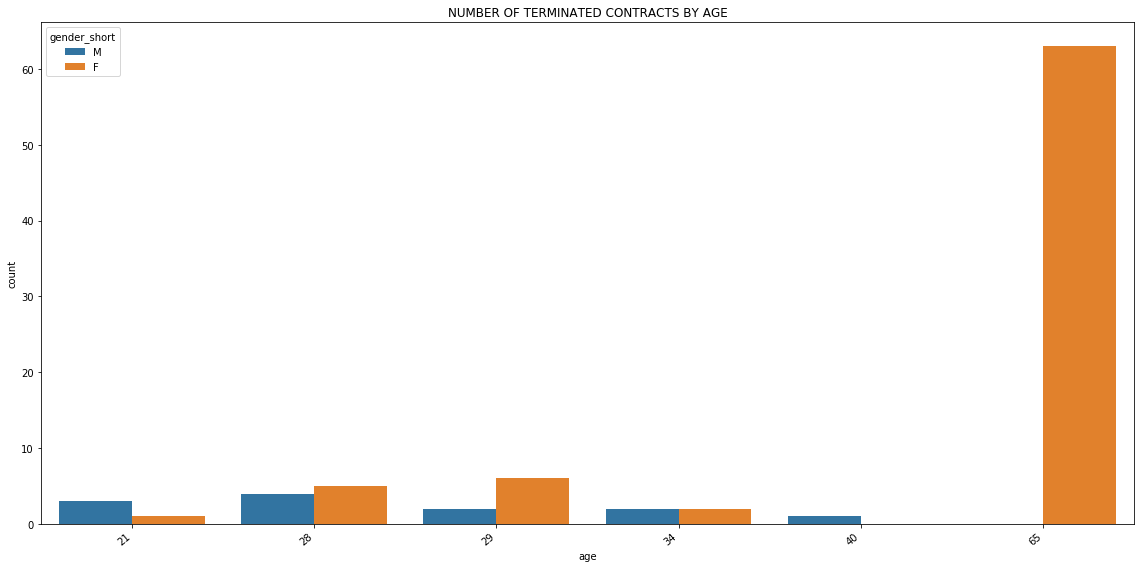

In [102]:
plt.figure(figsize=(16,8))
ax = sns.countplot(data=departed, x='age', hue='gender_short')


ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('NUMBER OF TERMINATED CONTRACTS BY AGE')
plt.tight_layout()

In [103]:
print("The number of people of the gender masculine that will leave the company is ", departed[departed['gender_short'] == 'M'].shape[0], ".")

The number of people of the gender masculine that will leave the company is  12 .


In [104]:
print("The number of people of the gender feminine that will leave the company is ", departed[departed['gender_short'] == 'F'].shape[0], ".")

The number of people of the gender feminine that will leave the company is  77 .


In [105]:
print("Among the 77 women that will leave the company ", departed[(departed['gender_short'] == 'F') & (departed['age'] == 65)].shape[0], "of them is at the age of 65.")

Among the 77 women that will leave the company  63 of them is at the age of 65.


This type of analysis might be repeated so that we might draw other conclusions as well.

# 8. Proposed next steps

Our MVP already has a great prediction power. Here we propose steps the might be taken in order to sophisticate the data science approach. These might include:

    i. If possible, test other models, or combination of them. Stick with the one that contains both elements of simplicity, robustness, and strong predictive power
    ii. Study more closely the feature importance aspect and the correlations between features before the feature selection process
    iii. Meet with the business team, show them the predictions, and use their experience to try to map under solid grounds the reason why the model presented such results (retirement, career progress, age, etc)
    iv. Create a project with clear steps and deadlines in order to deploy the final model.